<a href="https://colab.research.google.com/github/ddoneu/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%202/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Phase 1: The Robustness Audit (Topic 4)**

In [66]:
np.random.seed(42)

normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [67]:
def calculate_mad(data):

    # 1. Calculate the Median of the data
    median = np.median(data)

    # 2. Calculate Absolute Deviations (|x - median|)
    abs_deviations = np.abs(data - median)

    # 3. Return the Median of those deviations
    mad = np.median(abs_deviations)

    return mad

In [68]:

sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print(f"Standard Deviation: {sd:.2f}")
print(f"Median Absolute Deviation: {mad:.2f} \n")
print("SD uses mean + squaring which makes the outlier amplified resulted in unstable result")
print("MAD uses median, so only the middle value matters, makes the result more stable")
print("The 20 outliers blow up the SD to 300+ ms while the MAD stays around 8–10ms,\naccurately reflecting the typical user experience")

Standard Deviation: 458.89
Median Absolute Deviation: 8.00 

SD uses mean + squaring which makes the outlier amplified resulted in unstable result
MAD uses median, so only the middle value matters, makes the result more stable
The 20 outliers blow up the SD to 300+ ms while the MAD stays around 8–10ms,
accurately reflecting the typical user experience


## **The Probability Audit (Topic 5)**

In [69]:
def bayesian_audit(prior, sensitivity, specificity):

  numerator = sensitivity * prior
  denominator = (sensitivity * prior) + ((1 - specificity) * (1 - prior))
  posterior = numerator/denominator

  return posterior


In [70]:
sensitiviy = 0.98
specificity = 0.98

scenarios = {
    "Scenario A (Bootcamp)":0.50,
    "Scenario B (Econ Class)":0.05,
    "Scenario C (Honor Seminar)":0.001
}

for name, base_rate in scenarios.items():
    result = bayesian_audit(base_rate, sensitiviy, specificity)

    print(f"{name}")
    print(f"  Base Rate: {base_rate*100}%")
    print(f"  P(Cheater | Flagged): {result*100:.2f}%\n")


Scenario A (Bootcamp)
  Base Rate: 50.0%
  P(Cheater | Flagged): 98.00%

Scenario B (Econ Class)
  Base Rate: 5.0%
  P(Cheater | Flagged): 72.06%

Scenario C (Honor Seminar)
  Base Rate: 0.1%
  P(Cheater | Flagged): 4.68%



# **Phase 3: The Bias Audit (Topic 6)**

In [71]:
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
observed = np.array([50250,49750])
expected = np.array([50000,50000])


chi_square = np.sum((observed - expected)**2 / expected)

print(f"Chi-Square = {chi_square}")

if chi_square > 3.84:
    print("Invalid, due to engineering bias")
else:
    print("Valid, no significant mismatch")

Chi-Square = 2.5
Valid, no significant mismatch


In [72]:
#The question asked for a loop, but I think 1st way is faster
#Here is the loop way:

observed = np.array([50250,49750])
expected = np.array([50000,50000])


chi_square = 0
for i in range(len(observed)):
    chi_square += (observed[i] - expected[i])**2 / expected[i]

print(f"Chi-Square = {chi_square}")

if chi_square > 3.84:
    print("Invalid, due to engineering bias")
else:
    print("Valid, no significant mismatch")

Chi-Square = 2.5
Valid, no significant mismatch


# **Phase 4: AI Expansion (The Co-Pilot Era)**


SURVIVORSHIP BIAS REPORT

Total Tokens Launched:  10000
Survivors (Top 1%):     100
Failed Tokens:          9900

Mean Market Cap (ALL tokens):       $1,740.84
Mean Market Cap (Survivors only):   $43,633.52

Survivorship Multiplier: 25.1x

If you only study winners, you overestimate
the market by 25.1x. That's the lie.


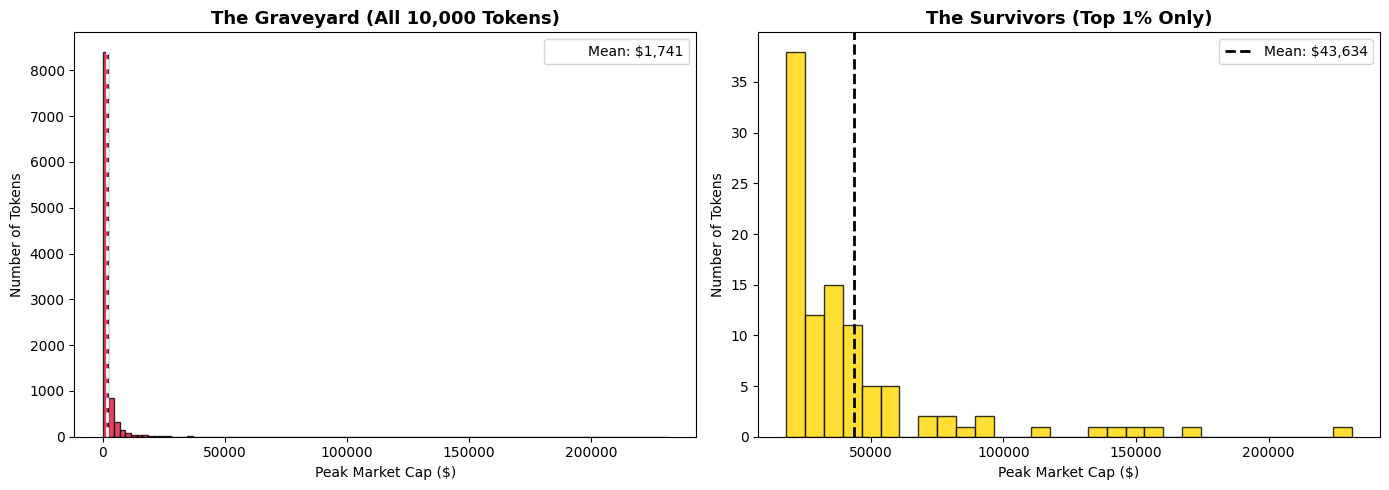


Chart saved as 'survivorship_bias.png'


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# --- Simulate 10,000 Token Launches ---
n_tokens = 10000

# Pareto distribution: most tokens worth almost nothing, a few moon
# shape=1.5 gives a heavy tail (power law behavior)
raw_market_caps = np.random.pareto(a=1.5, size=n_tokens) * 1000

# --- Build the two DataFrames ---

# The Graveyard: every single token, dead or alive
df_all = pd.DataFrame({
    "token_id": range(1, n_tokens + 1),
    "peak_market_cap": raw_market_caps
})

# Survivors: only the top 1% by market cap
threshold = np.percentile(raw_market_caps, 99)
df_survivors = df_all[df_all["peak_market_cap"] >= threshold].copy()

# --- The Bias in Numbers ---
mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print("=" * 50)
print("SURVIVORSHIP BIAS REPORT")
print("=" * 50)

print(f"\nTotal Tokens Launched:  {len(df_all)}")
print(f"Survivors (Top 1%):     {len(df_survivors)}")
print(f"Failed Tokens:          {len(df_all) - len(df_survivors)}")

print(f"\nMean Market Cap (ALL tokens):       ${mean_all:,.2f}")
print(f"Mean Market Cap (Survivors only):   ${mean_survivors:,.2f}")
print(f"\nSurvivorship Multiplier: {mean_survivors / mean_all:,.1f}x")
print(f"\nIf you only study winners, you overestimate")
print(f"the market by {mean_survivors / mean_all:,.1f}x. That's the lie.")

# --- Dual Histogram ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: The Graveyard (all tokens)
axes[0].hist(df_all["peak_market_cap"], bins=100, color="crimson", edgecolor="black", alpha=0.8)
axes[0].set_title("The Graveyard (All 10,000 Tokens)", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Peak Market Cap ($)")
axes[0].set_ylabel("Number of Tokens")
axes[0].axvline(mean_all, color="white", linestyle="--", linewidth=2, label=f"Mean: ${mean_all:,.0f}")
axes[0].legend(fontsize=10)

# Right: Survivors only (top 1%)
axes[1].hist(df_survivors["peak_market_cap"], bins=30, color="gold", edgecolor="black", alpha=0.8)
axes[1].set_title("The Survivors (Top 1% Only)", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Peak Market Cap ($)")
axes[1].set_ylabel("Number of Tokens")
axes[1].axvline(mean_survivors, color="black", linestyle="--", linewidth=2, label=f"Mean: ${mean_survivors:,.0f}")
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.savefig("survivorship_bias.png", dpi=150, bbox_inches="tight")
plt.show()

print("\nChart saved as 'survivorship_bias.png'")